# Analyse Datenqualität Wärmepumpendaten

#### Imports

In [2]:
import h5py
import pandas as pd
import numpy as np
import pickle 
from datetime import datetime
import math
import matplotlib
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None 

#### Einlesen der Daten

In [79]:
#read in data
with open('Data/heatpump/data_heatpump.pkl', 'rb') as f:
    load_dict = pickle.load(f)

#### Erstellen eines Dataframes, welcher zur Analyse fehlender bzw. nan Zellen dient

In [80]:
def check_nan(x):
    if x >= 0:
        return 1
    else: 
        return 0

In [82]:
df_result = load_dict['SFH10']['index'].to_frame()
for df in load_dict:
    load_dict[df][df] = load_dict[df]['P_TOT'].apply(check_nan)
    df_result = pd.concat([df_result, load_dict[df][df]], axis=1)
df_result.set_index('index', inplace=True)
df_result

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_data_availability_histogramm(df):
    # Datenverfügbarkeit berechnen
    data_availability = df.mean(axis=0)

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Farben festlegen
    colors = ['#ff9999' if value < 1 else '#66b266' for value in data_availability]

    # Horizontales Balkendiagramm zeichnen
    data_availability.plot(kind='barh', color=colors, ax=ax)

    # Achsentitel und Plot-Titel hinzufügen
    ax.set_title('Datenverfügbarkeit')
    ax.set_ylabel('Objekte')
    ax.set_xlabel('Verfügbarkeit in %')
    ax.set_xlim(0, 1)  # x-Achse auf den Bereich 0 bis 1 setzen

    # Anzeigen
    plt.tight_layout()
    plt.show()

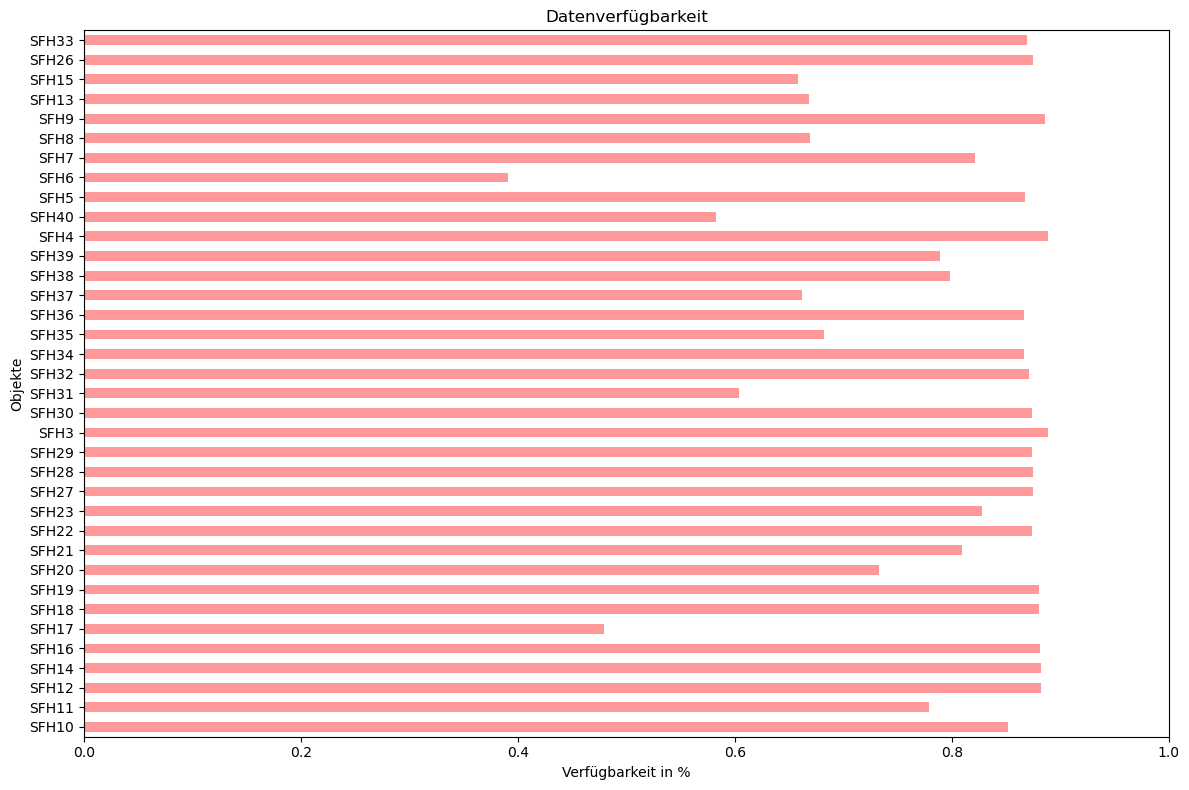

In [141]:
plot_data_availability_histogramm(df_result)

#### Develop functions to analize intervalls with missing values

In [15]:
df_10 = df_result['SFH10'].to_frame()
df_10

,SFH10
index,
1514764800,0
1514765700,0
1514766600,0
1514767500,0
1514768400,0
...,...
1609454700,0
1609455600,0
1609456500,0


In [48]:
def get_missing_intervalls(df, column):
    streak = False
    complete = False
    intervall_list = []
    for index, value in df.iterrows():
        if value.values[0] == 0:
            if streak == True:
                continue
            else:
                streak = True
                start = index
        if value.values[0] == 1:
            if streak == True:
                end = index-900
                complete = True
            

        if complete == True:
                print("entered complete")
                intervall_list.append([start, end])
                streak = False
                complete = False
    
    return intervall_list

In [49]:
get_missing_intervalls(df_10, 'SFH10')

entered complete


[[1514764800, 1525595400]]

In [38]:
counter = 0
for row, column in df_10.iterrows():
    if counter > 1:
        break

    #print(row)
    print(row)
    print(column.values[0])
    counter +=1 

1514764800
0
1514765700
0


In [52]:
import pandas as pd

# Erstellen Sie ein Beispiel-DataFrame basierend auf Ihrem gegebenen Bild
#data = {
#    'SFH10': [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]
#}
#index = [1514764800, 1514765700, 1514766600, 1514767500, 1514768400, 1609454700, 1609455600, 1609456500, 1609457400, 1609458300, 1609459200]
#df = pd.DataFrame(data, index=index)

df = df_10.copy()

# Gruppen von zusammenhängenden Nullen identifizieren
df['group'] = (df['SFH10'] != df['SFH10'].shift()).cumsum()
zero_groups = df[df['SFH10'] == 0].groupby('group')

# Start- und Endindizes von zusammenhängenden Nullen ausgeben
result = []
for name, group in zero_groups:
    start_index = group.index[0]
    end_index = group.index[-1]
    result.append((start_index, end_index))

print(result)


[(1514764800, 1525595400), (1606263300, 1609458300)]


In [63]:
def get_missing_intervalls(df, column):
    # Gruppen von zusammenhängenden Nullen identifizieren
    df['group'] = (df[column] != df[column].shift()).cumsum()
    zero_groups = df[df[column] == 0].groupby('group')
    # Start- und Endindizes von zusammenhängenden Nullen ausgeben
    result = []
    for name, group in zero_groups:
        start_index = group.index[0]
        end_index = group.index[-1]
        result.append((start_index, end_index))

    return result

def get_missing_intervalls_length(tuple):
    length = tuple[1] - tuple[0]
    return length

#### Analysis of missing intervalls

In [88]:
df_result.set_index('index', inplace=True)

for column in df_result.columns:
    df = df_result[column].to_frame()
    intervalls = get_missing_intervalls(df, column)
    print(column + ": " + str(intervalls))

SFH10: [(1514764800, 1525595400), (1606263300, 1609458300)]
SFH11: [(1514764800, 1525596300), (1590465600, 1600556400)]
SFH12: [(1514764800, 1525597200), (1525859100, 1526194800)]
SFH14: [(1514764800, 1525601700), (1525863600, 1526213700)]
SFH16: [(1514764800, 1525606200), (1525867200, 1526287500)]
SFH17: [(1514764800, 1525607100), (1525868100, 1526292900), (1531050300, 1531572300), (1534032900, 1535371200), (1567273500, 1600462800), (1600879500, 1603887300)]
SFH18: [(1514764800, 1525608000), (1525869000, 1526373000)]
SFH19: [(1514764800, 1525617000), (1525878900, 1526391000)]
SFH20: [(1514764800, 1525761900), (1526023800, 1533017700), (1534894200, 1542208500)]
SFH21: [(1514764800, 1525763700), (1526027400, 1533106800)]
SFH22: [(1514764800, 1525767300), (1526028300, 1526973300)]
SFH23: [(1514764800, 1525768200), (1526029200, 1526463900), (1531748700, 1535373000), (1599182100, 1600462800)]
SFH27: [(1514764800, 1525771800), (1526032800, 1526892300)]
SFH28: [(1514764800, 1526223600), (152

#### reduce dataframe to common start

In [106]:
counter = 0
for column in df_result.columns:
    df = df_result[column].to_frame()
    intervalls = get_missing_intervalls(df, column)

    if counter == 0:
        begin_index = intervalls[0][1]
        counter = 1
    else:
        if intervalls[0][1] < begin_index:
            print(column + " " + str(intervalls[0][1]))
            begin_index = intervalls[0][1]

print(begin_index)

SFH3 1525270500
1525270500


In [127]:
test = df_result[df_result.index >= 1525270500]

for row,value in test.iterrows():
    if test.loc[row].sum() > 30:
        print(">30: " + str(row))
        start_index = row
        break

df_final = df_result[df_result.index >= start_index]
df_final

>30: 1526464800


,SFH10,SFH11,SFH12,SFH14,SFH16,SFH17,SFH18,SFH19,SFH20,SFH21,...,SFH40,SFH5,SFH6,SFH7,SFH8,SFH9,SFH13,SFH15,SFH26,SFH33
index,,,,,,,,,,,,,,,,,,,,,
1526464800,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,1
1526465700,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,1
1526466600,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,1
1526467500,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,1
1526468400,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609454700,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1609455600,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1609456500,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1


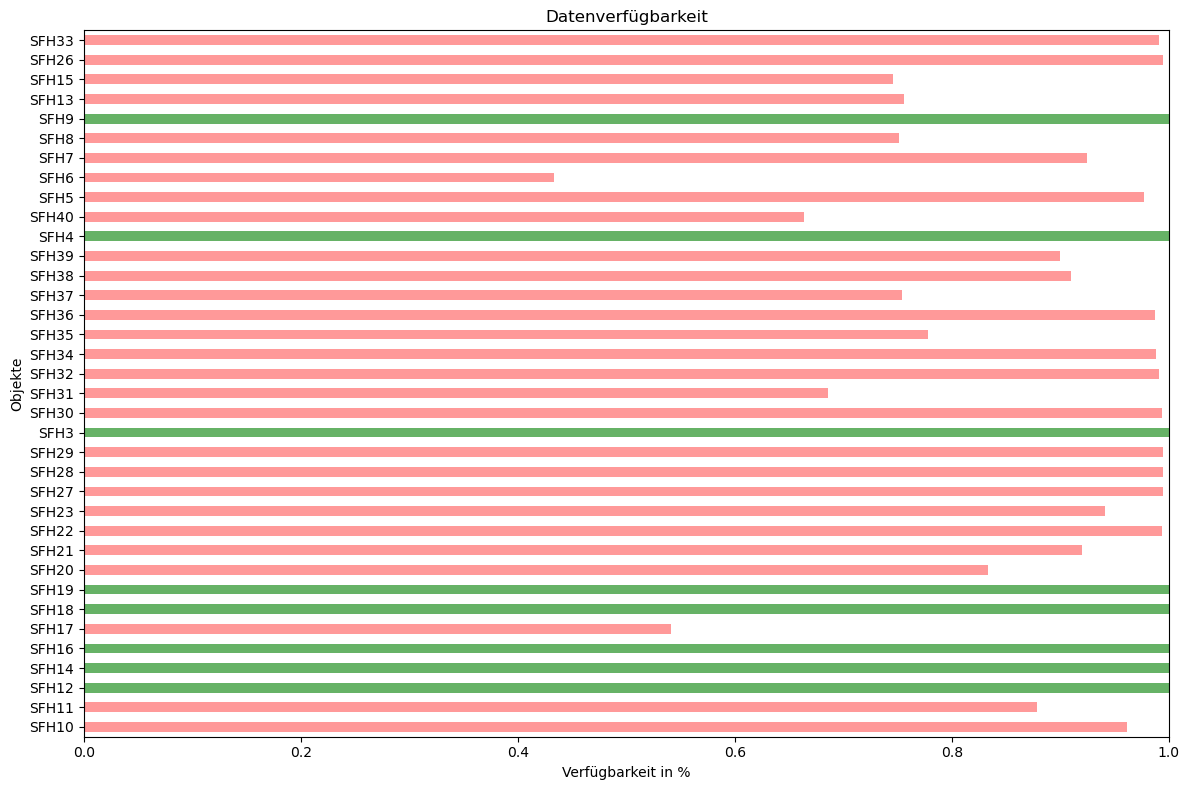

In [129]:
plot_data_availability(df_final)

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_data_availability(df):
    # Datenkonvertierung: Unix-Timestamp zu Datum
    df.index = pd.to_datetime(df.index, unit='s')

    # Reihenfolge der Spalten nach den Zahlen in den Objektbezeichnungen sortieren
    sorted_columns = sorted(df.columns, key=lambda x: int(x.replace("SFH", "")))

    # Prozentsätze für jede Spalte berechnen
    percentages = (df.sum() / len(df) * 100).round(2)
    percentages = percentages[sorted_columns]

    # Plot-Einstellungen, Verkleinerung der Figur
    fig, ax = plt.subplots(figsize=(7, 8))  # Kleinere Figurgröße

    # Durch jede sortierte Spalte iterieren und Datenverfügbarkeit zeichnen
    for i, column in enumerate(sorted_columns):
        # Datenverfügbarkeit
        ax.fill_between(df.index, i, i + 1, where=(df[column] == 1), color='#66D37A', step='mid')
        # Fehlende Daten
        ax.fill_between(df.index, i, i + 1, where=(df[column] == 0), color='#FF5252', step='mid')
        # Prozentsatz neben jedem Balken hinzufügen (mit zusätzlichem Leerzeichen und Abstand nach rechts)
        ax.text(df.index[-1] + pd.Timedelta(days=1), i + 0.5, f" {percentages[column]}%", verticalalignment='center', horizontalalignment='left')

    # Einstellungen
    # Anpassung der x-Limits, um den Platz für die Prozentsätze zu berücksichtigen
    ax.set_xlim([df.index.min(), df.index.max() + pd.Timedelta(days=1)])  # Reduzierter Platz für Prozentsätze
    ax.set_ylim([0, len(sorted_columns)])
    ax.set_yticks(np.arange(len(sorted_columns)) + 0.5)
    ax.set_yticklabels(sorted_columns)
    ax.set_title("Data Availability")
    ax.set_xlabel("Timestamps")
    ax.set_ylabel("Objects")

    # Farblegende hinzufügen
    ax.legend(handles=[plt.Line2D([0], [0], color='#66D37A', label='Available'),
                    plt.Line2D([0], [0], color='#FF5252', label='Missing')], loc='upper right')

    # Erweiterte Datumseinstellungen für die X-Achse mit 3-monatigem Intervall
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    fig.autofmt_xdate()

    plt.tight_layout()
    plt.show()

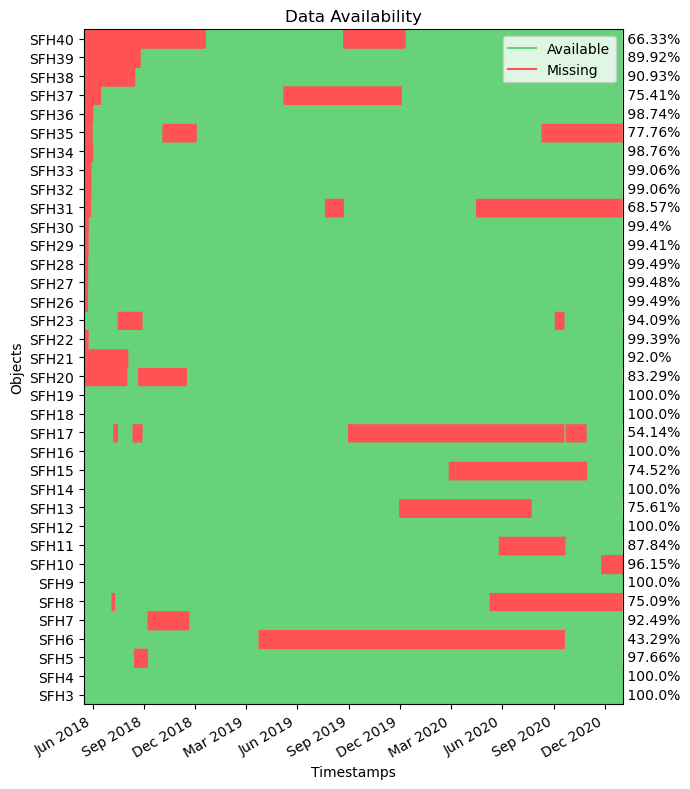

In [139]:
plot_data_availability(df_final)